<h1 style="color:#F72585">Transformation and Scaling of Numeric-Data in Python</h1>

<h2 style="color:#4CC9F0">Import Statements</h2>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn import datasets, linear_model

<h2 style="color:#4CC9F0">Data Sets</h2>

In [34]:
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

In [44]:
cars_df = pd.read_csv("./data_files/cars.csv")
cars_df.sample(3)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
26711,Nissan,Navara,mechanical,black,260000,2008,diesel,False,diesel,2.5,...,True,False,True,True,True,False,False,True,True,82
20156,Audi,A6,mechanical,black,283000,2011,diesel,False,diesel,2.0,...,True,True,True,False,True,True,True,True,True,57
11194,Ford,Courier,mechanical,blue,65000,1993,gasoline,False,gasoline,1.3,...,False,False,False,False,False,False,False,False,False,120


<p style="color:#CFBAF0">MinMax Scaler (Uniform Distribution)</p>

In [35]:
max_raw = max(raw)
min_raw = min(raw)

In [36]:
scaled = (2 * raw - max_raw- min_raw) / (max_raw - min_raw)

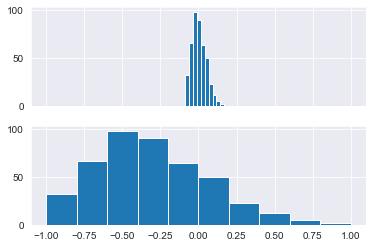

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
axes[0].hist(raw)
axes[1].hist(scaled)
plt.show()

In [38]:
def train_raw() -> None:
    linear_model.LinearRegression().fit(raw, y)

In [39]:
def train_scaled() -> None:
    linear_model.LinearRegression().fit(scaled, y)

In [40]:
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)
print("Train Raw: {}.".format(raw_time))
print("Scaled time: {}.".format(scaled_time))

Train Raw: 0.05467046700005085.
Scaled time: 0.04818481099982819.


<p style="color:#CFBAF0">Z-Score (Normal Distribution)</p>

<AxesSubplot:>

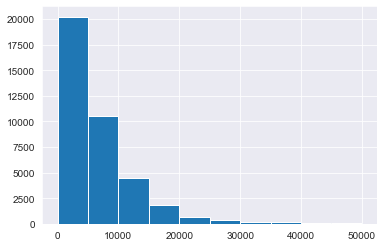

In [48]:
cars_df["price_usd"].hist()

<p style="color:#CFBAF0">Transform using $Tanh()$</p>

<AxesSubplot:>

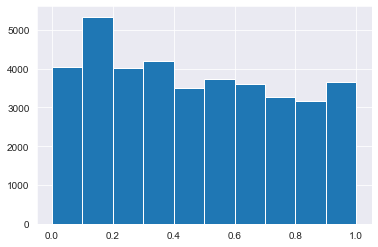

In [51]:
p = 10000
cars_df.price_usd.apply(lambda x : np.tanh(x/p)).hist()